<a href="https://colab.research.google.com/github/sai-ramani/weather_prediction/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#data loading
from google.colab import files
uploaded = files.upload()
weather = pd.read_csv(io.BytesIO(uploaded['seattle-weather.csv']))

Saving seattle-weather.csv to seattle-weather.csv


In [ ]:
weather.head()
weather.shape
weather.isna().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

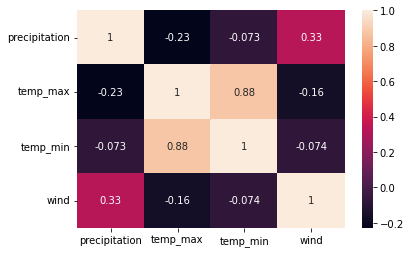

In [ ]:
#checking correlation
sns.heatmap(data=weather.corr(),annot=True)

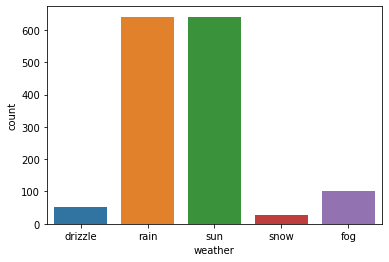

In [ ]:
#countplot
sns.countplot(data=weather, x='weather')

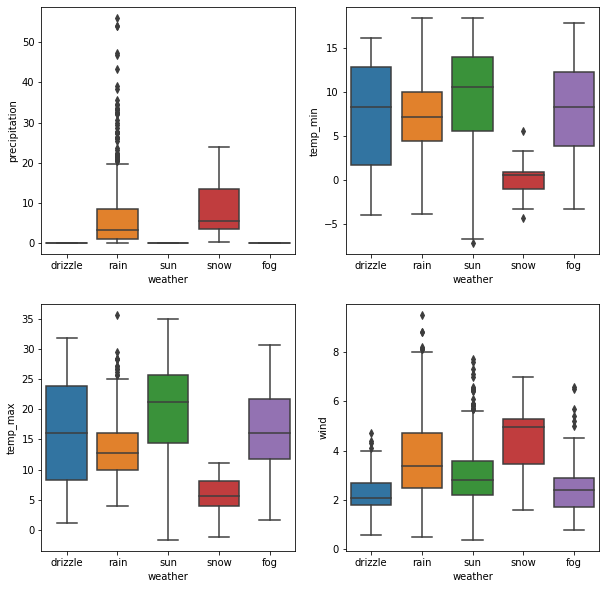

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
for i in range(4):
    sns.boxplot(x='weather', y=cols[i], data=weather, ax=axes[i%2,i//2])


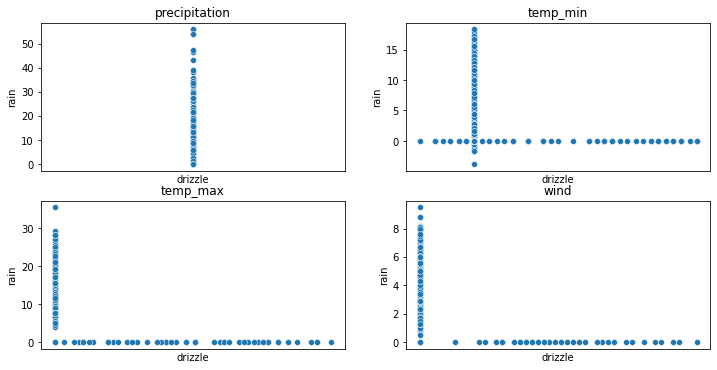

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12,6))
for i in range(len(cols)):
    sns.scatterplot(data=weather.pivot(index='date',columns='weather', values=cols[i]).fillna(0), x='drizzle', y='rain', ax=axes[i%2,i//2])
    axes[i%2,i//2].set_title(cols[i])
    axes[i%2,i//2].set_xticks([])
plt.show()

In [ ]:
#there is no correlation between drizzle and rain
#for normalization
def normalizethis(data,cols):
    for x in cols:
        data[x] = data[x]/data[x].max()
normalizethis(weather,cols)
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.000000,0.359551,0.273224,0.494737,drizzle
1,2012-01-02,0.194991,0.297753,0.153005,0.473684,rain
2,2012-01-03,0.014311,0.328652,0.393443,0.242105,rain
3,2012-01-04,0.363148,0.342697,0.306011,0.494737,rain
4,2012-01-05,0.023256,0.250000,0.153005,0.642105,rain


In [ ]:
y= weather.pop('weather')
weather.pop('date')
X= weather

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier(bootstrap=False)
gbc = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
knn= KNeighborsClassifier()

In [ ]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
gbc.fit(x_train,y_train)
dt.fit(x_train,y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_gbc = gbc.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_knn = knn.predict(x_test)

In [ ]:
print('LogReg Accuracy = {:.2f}'.format(lr.score(x_test,y_test)))
print('RandFor Accuracy = {:.2f}'.format(rf.score(x_test,y_test)))
print('GBC Accuracy = {:.2f}'.format(gbc.score(x_test,y_test)))
print('DT Accuracy = {:.2f}'.format(dt.score(x_test,y_test)))
print('SVC Accuracy = {:.2f}'.format(svc.score(x_test,y_test)))
print('KNN Accuracy = {:.2f}'.format(knn.score(x_test,y_test)))

LogReg Accuracy = 0.72
RandFor Accuracy = 0.78
GBC Accuracy = 0.82
DT Accuracy = 0.75
SVC Accuracy = 0.72
KNN Accuracy = 0.64


In [ ]:
#classification report
print('LogReg\n',classification_report(y_test,y_pred_lr, zero_division=0))
print('GBC\n',classification_report(y_test,y_pred_gbc, zero_division=0))
print('RF\n',classification_report(y_test,y_pred_rf, zero_division=0))
print('DT\n',classification_report(y_test,y_pred_dt, zero_division=0))
print('KNN\n',classification_report(y_test,y_pred_knn, zero_division=0))

LogReg
               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        18
         fog       0.00      0.00      0.00        35
        rain       0.75      0.81      0.78       189
        snow       0.00      0.00      0.00         8
         sun       0.69      0.85      0.76       189

    accuracy                           0.72       439
   macro avg       0.29      0.33      0.31       439
weighted avg       0.62      0.72      0.66       439

GBC
               precision    recall  f1-score   support

     drizzle       0.50      0.11      0.18        18
         fog       0.40      0.11      0.18        35
        rain       0.97      0.90      0.93       189
        snow       0.40      0.50      0.44         8
         sun       0.75      0.95      0.84       189

    accuracy                           0.82       439
   macro avg       0.60      0.52      0.52       439
weighted avg       0.80      0.82      0.79       439

RF
      

In [ ]:
#We can see our recall, precision and f1-score for drizzle and fog is quite poor, our model cannot accurately classify these values.
y_train.value_counts()\

rain       452
sun        451
fog         66
drizzle     35
snow        18
Name: weather, dtype: int64

In [ ]:
sm = SMOTE(sampling_strategy={'sun':y_train.value_counts()['sun'],'rain':y_train.value_counts()['rain'],'fog':int(y_train.value_counts()['fog']*1.2),
                              'drizzle':int(y_train.value_counts()['drizzle']*1.3), 'snow':int(y_train.value_counts()['snow']*1.5)},random_state=0)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [ ]:
rus = RandomUnderSampler(random_state=0, sampling_strategy={'sun':int(y_res.value_counts()['sun']*0.8),'rain':int(y_res.value_counts()['rain']*0.9),
                                                            'fog':y_res.value_counts()['fog'],'drizzle':y_res.value_counts()['drizzle'], 'snow':y_res.value_counts()['snow']})
X_resampled, y_resampled = rus.fit_resample(X_res, y_res)
print(sorted(Counter(y_resampled).items()))

[('drizzle', 45), ('fog', 79), ('rain', 406), ('snow', 27), ('sun', 360)]


In [ ]:
gbc.fit(X_res,y_res)
gbc.score(x_test,y_test)
y_pred2_gbc = gbc.predict(x_test)
print(classification_report(y_test,y_pred2_gbc))

              precision    recall  f1-score   support

     drizzle       0.40      0.11      0.17        18
         fog       0.29      0.06      0.10        35
        rain       0.98      0.90      0.94       189
        snow       0.40      0.50      0.44         8
         sun       0.75      0.96      0.84       189

    accuracy                           0.82       439
   macro avg       0.56      0.51      0.50       439
weighted avg       0.79      0.82      0.79       439



In [ ]:
rf.fit(X_res,y_res)
rf.score(x_test,y_test)

0.785876993166287

In [ ]:
lr.fit(X_res,y_res)
lr.score(x_test,y_test)

0.7107061503416856

In [ ]:
print('GBC\n',classification_report(y_test,gbc.predict(x_test), zero_division=0))
print('RF\n',classification_report(y_test,rf.predict(x_test), zero_division=0))

GBC
               precision    recall  f1-score   support

     drizzle       0.40      0.11      0.17        18
         fog       0.29      0.06      0.10        35
        rain       0.98      0.90      0.94       189
        snow       0.40      0.50      0.44         8
         sun       0.75      0.96      0.84       189

    accuracy                           0.82       439
   macro avg       0.56      0.51      0.50       439
weighted avg       0.79      0.82      0.79       439

RF
               precision    recall  f1-score   support

     drizzle       0.25      0.11      0.15        18
         fog       0.30      0.26      0.28        35
        rain       0.94      0.89      0.92       189
        snow       0.36      0.50      0.42         8
         sun       0.76      0.85      0.80       189

    accuracy                           0.79       439
   macro avg       0.52      0.52      0.52       439
weighted avg       0.78      0.79      0.78       439



In [ ]:
gbc.fit(X_resampled,y_resampled)
gbc.score(x_test,y_test)

0.8177676537585421